In [5]:
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import networkx as nx
import numpy as np
import pandas as pd
from discreteMarkovChain import markovChain
import os
import glob
import random
from scipy.stats import expon

### 0.prologue
0.0345 # Start/End
0.4828 # ANTIGONE
0.4828 # ISMENE
### 1.parodos
0.0250 # Start/End
0.1000 # CHORUS
0.2250 # CHORAGOS
0.3750 # CREON
0.2750 # SENTRY
### 2.ode_i
0.0145 # Start/End
0.0145 # CHORUS
0.0870 # CHORAGOS
0.0725 # SENTRY
0.3623 # CREON
0.2899 # ANTIGONE
0.1594 # ISMENE
### 3.ode_ii
0.0213 # Start/End
0.0213 # CHORUS
0.1277 # CHORAGOS
0.4468 # CREON
0.3830 # HAIMON
### 4.ode_iii
0.0526 # Start/End
0.2632 # CHORUS
0.1053 # CHORAGOS
0.4211 # ANTIGONE
0.1579 # CREON
### 5.ode_iv
0.0238 # Start/End
0.1190 # CHORUS
0.2857 # TEIRESIAS
0.3571 # CREON
0.2143 # CHORAGOS
### 6.exodos
0.0263 # Start/End
0.3421 # MESSENGER
0.3421 # CHORAGOS
0.0263 # EURIDICE
0.2632 # CREON


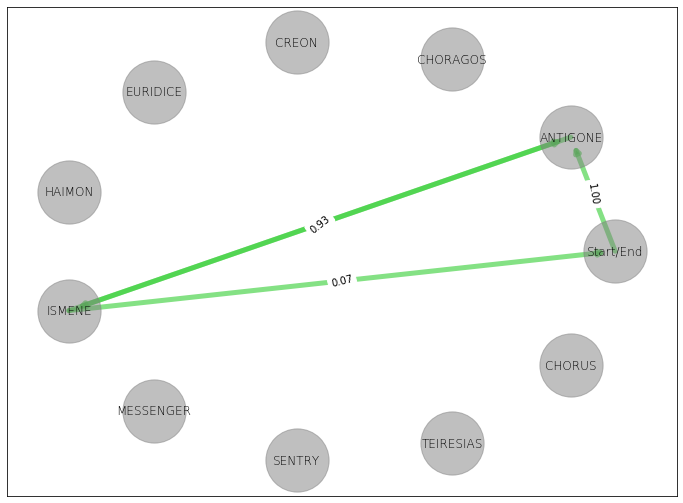

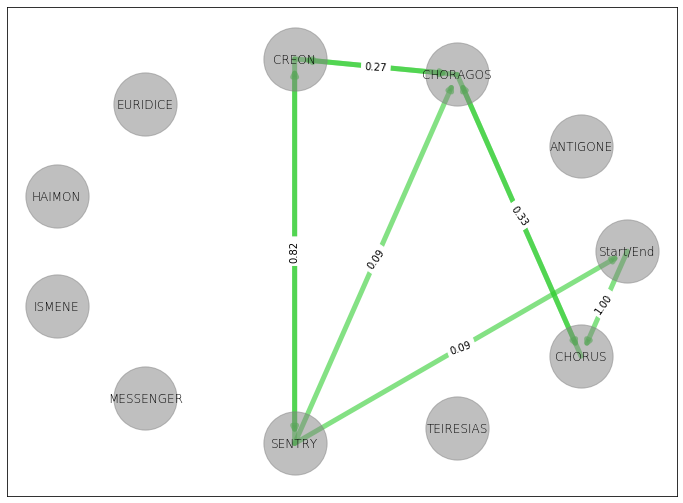

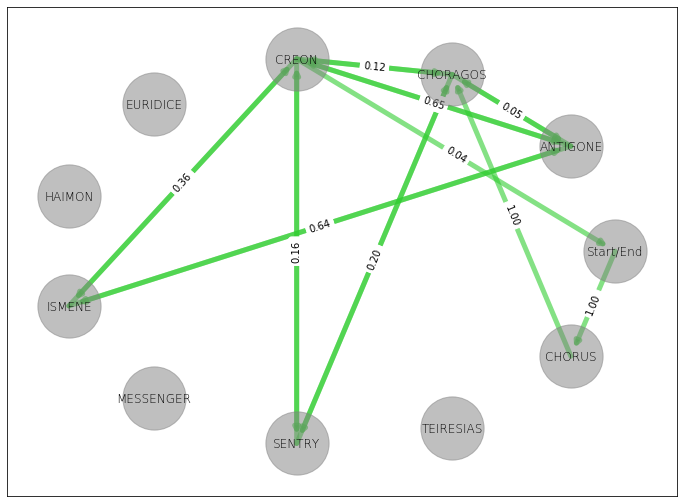

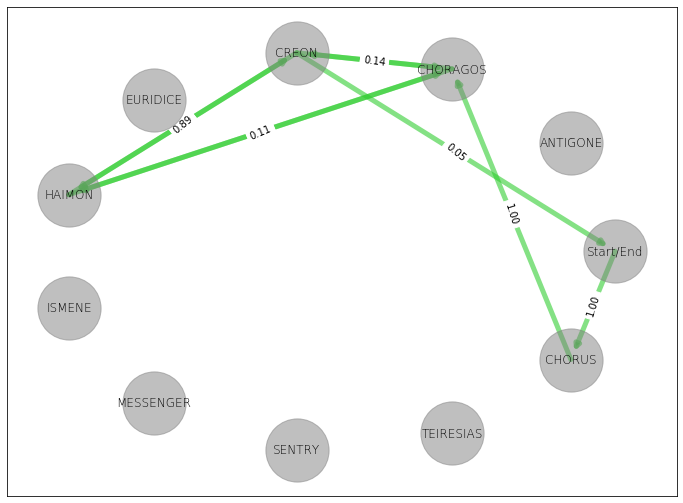

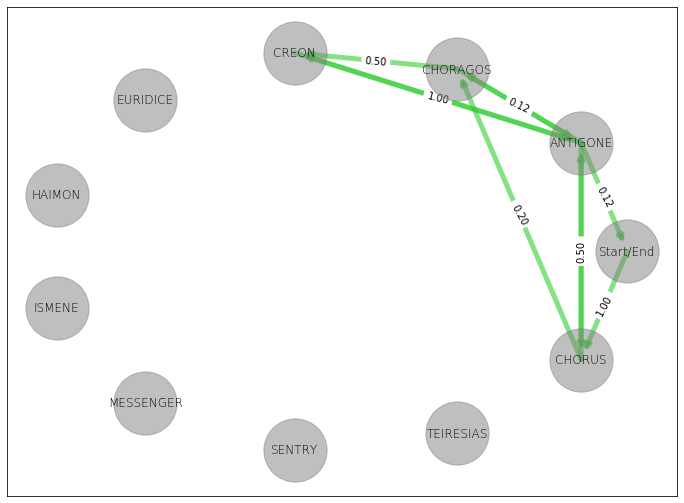

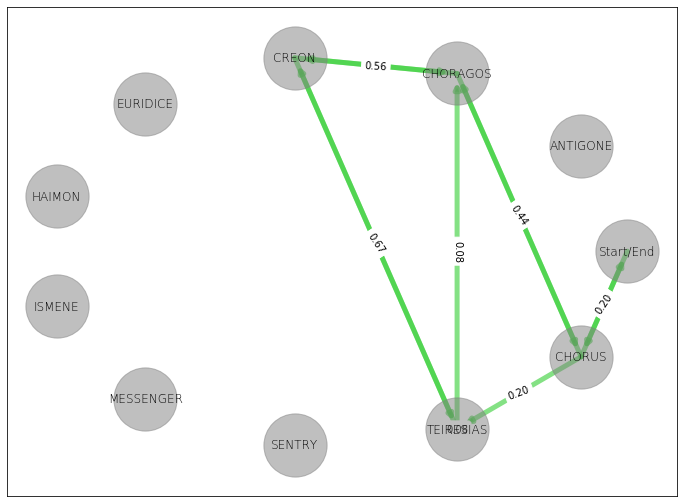

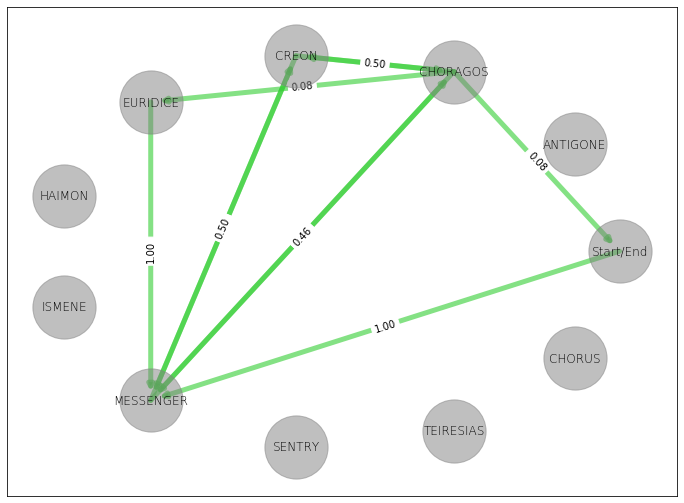

In [10]:
all_chars = ["Start/End","ANTIGONE", "CHORAGOS", "CREON", "EURIDICE", "HAIMON", "ISMENE", "MESSENGER", "SENTRY", "TEIRESIAS", "CHORUS"]

c = 0
cd = np.zeros((len(glob.glob("*.txt")),len(all_chars)))
for loc in sorted(glob.glob("*.txt")):
    with open(loc) as fp:
        xx = fp.readlines()
    order_of_speech = [x.strip() for x in xx]
    d = {x:order_of_speech.count(x) for x in order_of_speech}
    chars = ["Start/End"]
    chars += list(d.keys())
    P = np.zeros((len(chars),len(chars)))
    prev = chars.index(order_of_speech[0])
    for s in order_of_speech[1:]:
        current = chars.index(s)
        P[prev][current] += 1
        prev = current
    P[prev][chars.index("Start/End")] += 1
    P[chars.index("Start/End")][chars.index(order_of_speech[0])] += 1
    mapping = {}
    for i,v in enumerate(chars):
        mapping[i]=v
    P /=  P.sum(axis=1)[:,np.newaxis]
    mc = markovChain(P)
    mc.computePi('eigen')
    print("###",loc.split("/")[-1].replace(".txt",""))
    for i in range(len(chars)):
        print("%.4f # %s" % (mc.pi[i],mapping[i]))
        cd[c,all_chars.index(mapping[i])] = mc.pi[i]
    c += 1
    G = nx.DiGraph()
    for n in all_chars:
        G.add_node(n)
    labels={}
    edge_labels={}
    for i, origin_state in enumerate(chars):
        for j, destination_state in enumerate(chars):
            rate = P[i][j]
            if rate > 0:
                G.add_edge(origin_state,
                        destination_state,
                        weight=rate,
                        label="{:.02f}".format(rate))
                edge_labels[(origin_state, destination_state)] = label="{:.02f}".format(rate)
    plt.figure(figsize=(12,9))
    pos = nx.shell_layout(G)
    nx.draw_networkx_edges(G, pos, width = 5, alpha = 0.6, style = 'dashed', edge_color='#32CD32')
    nx.draw_networkx_labels(G, pos, font_weight=5)
    nx.draw_networkx_edge_labels(G, pos, edge_labels)
    nx.draw_networkx_nodes(G, pos, alpha=0.5, node_color='gray',node_shape='o' , node_size=4000)

0.0 29.1541
0.0 39.6684
0.0 69.1423
0.0 46.3662
0.0 19.2247
0.0 42.0092


No handles with labels found to put in legend.


0.0 38.4142


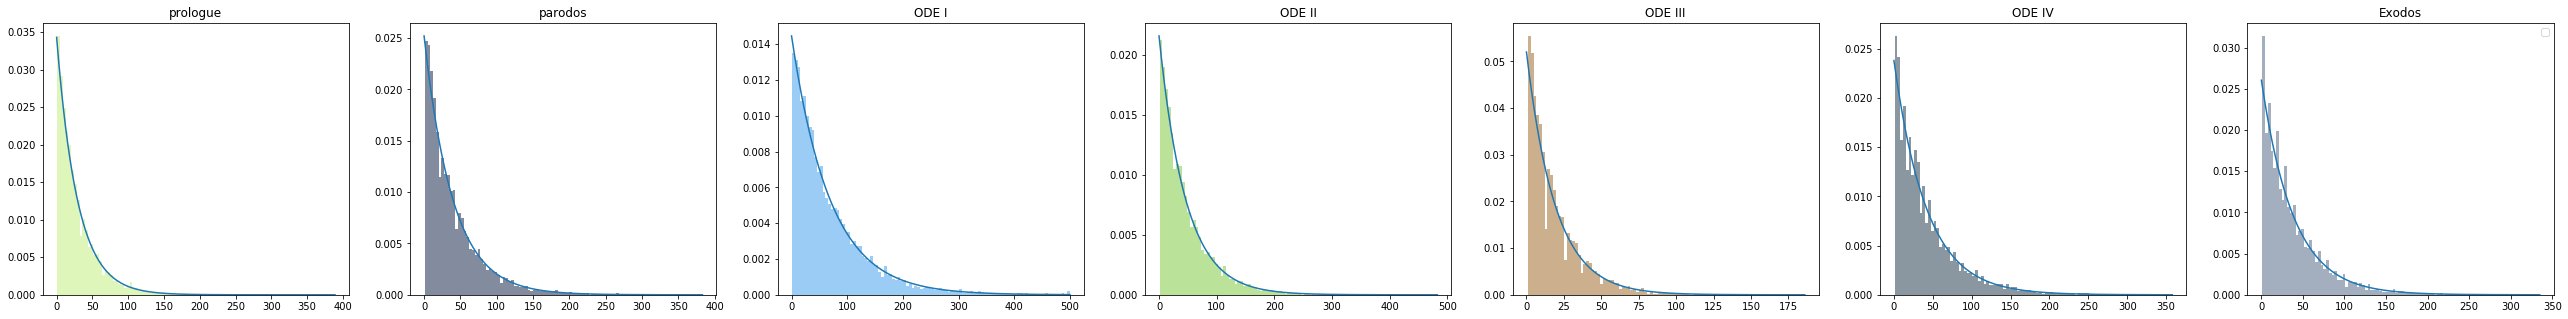

In [3]:
number = 10000
alphas = []
kwargs = dict(alpha=0.5, bins=100, density=True)
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
labels = ['prologue', 'parodos', 'ODE I', 'ODE II', 'ODE III', 'ODE IV', 'Exodos']
np.random.seed(int.from_bytes(os.urandom(4), byteorder='little')) 
fig = plt.figure(figsize=(45,5))
for i in range(7):
    avg = []
    for k in range(number):
        char_order = []
        for t in range(500):
            random_character = all_chars[np.random.choice(11, 1, p=cd[i,:])[0]]
            char_order.append(random_character)
            if random_character == "Start/End":
                break
        avg.append(len(char_order))
    avg.sort(reverse=True)
    ax = fig.add_subplot(1,7,i+1)
    ax.hist(avg, **kwargs, color=np.random.rand(3,))
    ax.set_title(labels[i])
    loc, scale = expon.fit(avg, floc=0)
    print(loc, scale)
    x = np.linspace(0,max(avg),1000)
    y = expon.pdf(x, loc, scale)
    ax.plot(x, y)
    alphas.append(scale)

plt.legend();
plt.savefig('figures/histogram_antigone.png')

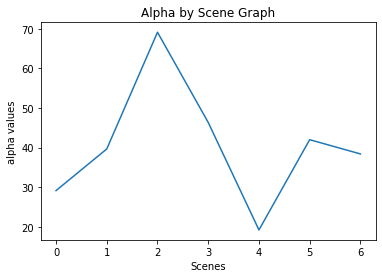

In [4]:
plt.plot(range(7),alphas)
plt.xlabel('Scenes')
plt.ylabel('alpha values')
plt.title('Alpha by Scene Graph')
plt.savefig('figures/antigone_alpha.png')